<a href="https://colab.research.google.com/github/onecme/myPortofolio/blob/main/predictAndSumaryReviewsOnSportify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=835d8023bf5129e70a6a69d17d6143a76fcb451d35fe7b3b44baa72510cd078d
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from pyngrok import ngrok
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/reviewSportify.csv')
df

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...
52697,Yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,POSITIVE
52700,Good,POSITIVE


In [ ]:
df.shape

(52702, 2)

##**Eda**

In [ ]:
df['label'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [ ]:
label_counts = df['label'].value_counts()
label_counts

,count
label,
NEGATIVE,29423
POSITIVE,23279


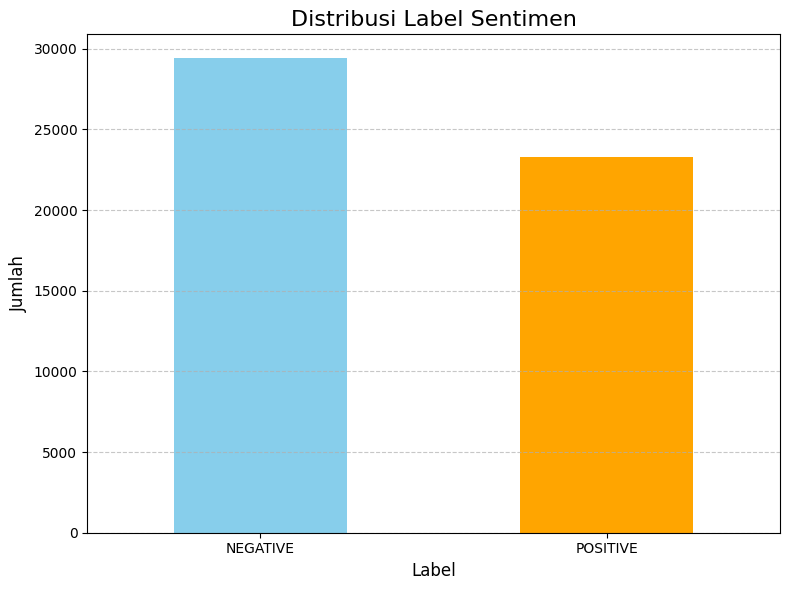

In [ ]:
# Membuat diagram batang
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribusi Label Sentimen', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(df['Review'][33])

Plz remove adds as because ther are continuously 2 to 3 adds at list remove 2 adds and give 1 adds


In [ ]:
print(df['label'][33])

NEGATIVE


##**Cleaning**

In [ ]:
df.isnull().sum()

,0
Review,16
label,0


In [ ]:
df = df.dropna(subset=['Review'])

In [ ]:
df.isnull().sum()

,0
Review,0
label,0


In [ ]:
import re

def cleaning_text(text):
    clean_text = re.sub(r'(\.){2,}', '.', text)
    clean_text = clean_text.lower()
    clean_text = re.sub(r'(!){2,}', '!', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!".',()"+'-:#$&<>/;=%@{|[\]`~*"""),
    '',clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', '', clean_text)
    return clean_text

In [ ]:
cleaned = cleaning_text(df['Review'][33])
print(cleaned)

plz remove adds as because ther are continuously 2 to 3 adds at list remove 2 adds and give 1 adds


In [ ]:
df['Review'] = df['Review'].apply(lambda x: cleaning_text(x))

<ipython-input-16-7b6a46baba9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(lambda x: cleaning_text(x))


In [ ]:
df['Review']

,Review
0,great music service the audio is high quality ...
1,please ignore previous negative rating this ap...
2,this popup get the best spotify experience on ...
3,really buggy and terrible to use as of recently
4,dear spotify why do i get songs that i didnt p...
...,...
52697,yes the best
52698,spotify won my heart in feb 2024 you won my he...
52699,i tried to open the app and it wont open i res...
52700,good


##**Mengubah kategori menjadi numerik**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df

<ipython-input-18-c9f3b93cdc8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = le.fit_transform(df['label'])


,Review,label
0,great music service the audio is high quality ...,1
1,please ignore previous negative rating this ap...,1
2,this popup get the best spotify experience on ...,0
3,really buggy and terrible to use as of recently,0
4,dear spotify why do i get songs that i didnt p...,0
...,...,...
52697,yes the best,1
52698,spotify won my heart in feb 2024 you won my he...,1
52699,i tried to open the app and it wont open i res...,1
52700,good,1


##**Vactorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Review'])
review_vector = tfidf.transform(df['Review'])
review_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 635861 stored elements and shape (52686, 26102)>

##**Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X = review_vector
Y = df['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(42148, 26102)

In [ ]:
x_test.shape

(10538, 26102)

# **Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Akurasi pada data test
accuracyScore = accuracy_score(y_test, y_pred)
print("Akurasi: ",accuracyScore)
# Akurasi pada data pelatihan
train_accuracy = model.score(x_train, y_train)
print("Akurasi pada Data Pelatihan:", train_accuracy)


Akurasi:  0.8803378250142342
Akurasi pada Data Pelatihan: 0.9031508019360349


In [ ]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
myReview = """
I've been using Spotify for several months now, and while I initially loved the variety of music and curated playlists,
my experience has deteriorated significantly. One of the biggest issues is the constant buffering, even when my internet connection is stable.
It's incredibly frustrating to have songs pause midway, especially during a workout or while commuting.
Another major drawback is the frequent crashes that have started happening with the recent updates. The app used to be smooth,
but now it feels like a hassle to use. While I appreciate the vast library of music,
these technical issues are making it hard to justify keeping my subscription. If these problems persist,
I might have to explore other alternatives. For now, I can't recommend it.
"""

##**Klasifikasi**

In [ ]:
model = pickle.load(open('/content/model.pkl', 'rb'))
tfidf = pickle.load(open('/content/tfidf.pkl', 'rb'))
cleaned_review = cleaning_text(myReview)
input_features = tfidf.transform([cleaned_review])
prediction_id = model.predict(input_features)[0]
category_mapping = {
    0 : 'Comment Negative',
    1 : 'Comment Positive'
}

predicted_category = category_mapping[prediction_id]

print(f'Result {prediction_id} yang artinya {predicted_category}')

Result 0 yang artinya Comment Negative


##**Evaluasi**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=['Comment Negative', 'Comment Positive']))

                  precision    recall  f1-score   support

Comment Negative       0.89      0.90      0.89      5864
Comment Positive       0.87      0.85      0.86      4674

        accuracy                           0.88     10538
       macro avg       0.88      0.88      0.88     10538
    weighted avg       0.88      0.88      0.88     10538



Hasil evaluasi menunjukkan bahwa model memiliki akurasi keseluruhan sebesar 88% dalam mengklasifikasikan sentimen komentar sebagai positif atau negatif. Precision untuk komentar negatif adalah 89%, artinya dari semua prediksi negatif, 89% benar-benar negatif, sedangkan precision untuk komentar positif adalah 87%. Recall untuk komentar negatif adalah 90%, menunjukkan bahwa model berhasil mendeteksi 90% dari semua komentar negatif, sementara recall untuk komentar positif adalah 85%, yang berarti 85% komentar positif berhasil diklasifikasikan dengan benar. F1-score, yang merupakan kombinasi dari precision dan recall, menunjukkan nilai 89% untuk komentar negatif dan 86% untuk komentar positif, mengindikasikan performa yang cukup baik untuk kedua kelas. Dengan distribusi data yang cukup seimbang, metrik ini menunjukkan bahwa model dapat diandalkan untuk tugas klasifikasi sentimen.

Model ini cukup andal dalam memprediksi sentimen komentar, dengan akurasi sebesar 88%. Artinya, dari setiap 100 komentar, sekitar 88 berhasil diklasifikasikan dengan benar sebagai positif atau negatif. Model ini sedikit lebih baik dalam mendeteksi komentar negatif dibandingkan positif, tetapi secara keseluruhan performanya sudah baik untuk digunakan.

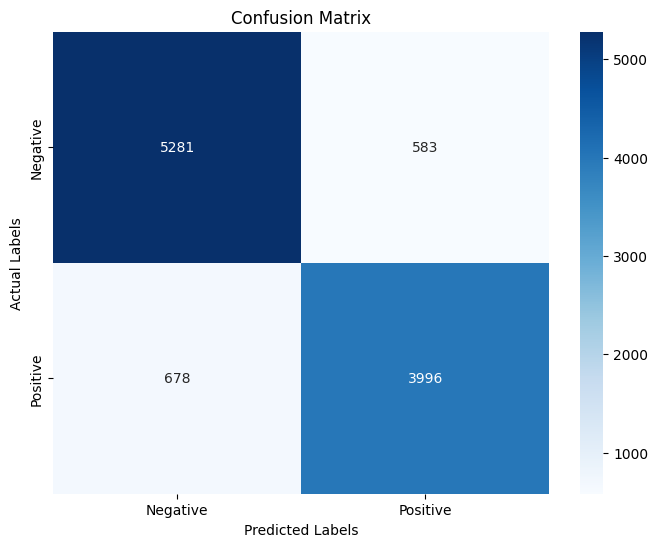

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


Model sangat baik dalam mengklasifikasikan komentar negatif, terlihat dari 5281 prediksi benar (True Negative), tetapi mengalami beberapa kelemahan seperti 678 kesalahan False Negative (komentar positif salah diklasifikasikan sebagai negatif) dan 583 kesalahan False Positive (komentar negatif salah diklasifikasikan sebagai positif). Hal ini menunjukkan bahwa model kurang sensitif dalam mendeteksi komentar positif. Untuk meningkatkan performa, model dapat diperbaiki dengan tuning hyperparameter, menyeimbangkan data, atau mencoba algoritma lain. Visualisasi ini mempermudah identifikasi kelemahan model secara intuitif.

In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluasi model menggunakan cross-validation (dengan 5 fold sebagai contoh)
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

# Akurasi rata-rata dari cross-validation
mean_cv_score = cv_scores.mean()
print("Akurasi Rata-rata Cross-Validation: ", (mean_cv_score))

Akurasi Rata-rata Cross-Validation:  0.8796621250675696


In [ ]:
from transformers import pipeline


try:
    summarizer = pipeline("summarization")  # Load the summarizer model
    summary = summarizer(cleaned_review, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
except Exception as e:
    print("Summarization Error:", e)
    summary = cleaned_review  # If an error occurs, use the original text

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
print(summary)

 Problems include constant buffering and frequent crashes that have started happening with the recent updates the app used to be smooth. It feels like a hassle to use while i appreciate the vast library of music.


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
score = scorer.score(cleaned_review, summary)
score


{'rouge1': Score(precision=0.9722222222222222, recall=0.2845528455284553, fmeasure=0.44025157232704404),
 'rouge2': Score(precision=0.8571428571428571, recall=0.2459016393442623, fmeasure=0.3821656050955414),
 'rougeL': Score(precision=0.9166666666666666, recall=0.2682926829268293, fmeasure=0.4150943396226415)}

Hasil yang Anda dapatkan adalah evaluasi menggunakan metrik ROUGE (Recall-Oriented Understudy for Gisting Evaluation), yang mengukur kualitas ringkasan berdasarkan kesamaan dengan teks referensi (dalam hal ini teks asli atau cleaned_review). Berikut adalah penjelasan tentang metrik yang digunakan:

1. ROUGE-1 (rouge1): Mengukur kesamaan n-gram dengan panjang 1, yaitu kata-kata individu.

* Precision: 0.972 (kemampuan ringkasan untuk menyertakan kata-kata penting dari teks asli). Artinya, 97,2% kata dalam summary ada dalam teks asli.
* Recall: 0.285 (kemampuan ringkasan untuk mencakup kata-kata penting dari teks asli). Artinya, hanya sekitar 28,5% kata-kata penting dari teks asli yang ada di summary.
* F-measure: 0.44 (harmonic mean dari precision dan recall). Metrik ini memberi gambaran umum keseimbangan antara precision dan recall. Nilai 0.44 menunjukkan ada beberapa kesalahan dalam menyertakan kata-kata penting dari teks asli.

2. ROUGE-2 (rouge2): Mengukur kesamaan n-gram dengan panjang 2, yaitu pasangan kata (bigram).

* Precision: 0.857 (kemampuan summary untuk menyertakan pasangan kata yang relevan). Artinya, 85,7% pasangan kata dalam summary ada dalam teks asli.
* Recall: 0.246 (kemampuan summary untuk mencakup pasangan kata yang relevan). Artinya, hanya sekitar 24,6% pasangan kata dalam teks asli yang ada di summary.
* F-measure: 0.38 (harmonic mean dari precision dan recall). Nilai ini lebih rendah dibandingkan dengan ROUGE-1, yang menunjukkan bahwa summary mungkin kurang baik dalam menyertakan pasangan kata yang lebih kompleks.

3. ROUGE-L (rougeL): Mengukur kesamaan dalam urutan panjang terpanjang (Longest Common Subsequence) antara teks asli dan summary.

* Precision: 0.917 (kemampuan ringkasan untuk mempertahankan urutan kata yang relevan). Artinya, 91,7% urutan kata dalam summary ada dalam urutan yang sama di teks asli.
* Recall: 0.268 (kemampuan summary untuk mempertahankan urutan kata yang relevan). Artinya, sekitar 26,8% urutan kata dalam teks asli ada di summary.
* F-measure: 0.415 (harmonic mean dari precision dan recall). Ini menunjukkan keseimbangan yang lebih baik daripada ROUGE-2, tetapi masih ada ruang untuk peningkatan dalam menyertakan urutan kata penting

##**Deployment**

In [ ]:
%%writefile app.py

import re
import streamlit as st
import pickle
from transformers import pipeline

# Fungsi cleaning_text
def cleaning_text(text):
    clean_text = re.sub(r'(\.){2,}', '.', text)  # Mengganti banyak titik dengan satu titik
    clean_text = clean_text.lower()
    clean_text = re.sub(r'(!){2,}', '!', clean_text)   # Mengganti banyak tanda seru dengan satu tanda seru
    clean_text = re.sub('[%s]' % re.escape("""!".',()"+'-:#$&<>/;=%@{|[\]~*"""), '', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', '', clean_text) # Menghapus karakter non-ASCII
    return clean_text

# Load model dan vectorizer
model = pickle.load(open('/content/model.pkl', 'rb'))
tfidf = pickle.load(open('/content/tfidf.pkl', 'rb'))

category_mapping = {
    0 : 'Comment Negative',
    1 : 'Comment Positive'
}

# Load summarizer
try:
    summarizer = pipeline("summarization")
except Exception as e:
    summarizer = None

# Tampilan website
st.title("Review Sentiment & summary")

# Layout
col1, col2 = st.columns(2)

with col1:
    st.header("Input Teks")
    user_input = st.text_area("Masukkan teks review di sini", height=250)

    if st.button("Proses"):
        if user_input.strip() != "":
            # Preprocess input
            cleaned_review = cleaning_text(user_input)
            input_features = tfidf.transform([cleaned_review])

            # Predict sentiment
            prediction_id = model.predict(input_features)[0]
            predicted_category = category_mapping[prediction_id]

            # Summarizer
            if summarizer:
                summary = summarizer(cleaned_review, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
            else:
                summary = "Summarizer tidak tersedia"

            # Display results in column 2
            with col2:
                st.header("Hasil")
                st.write(f"*Label Sentimen*: {predicted_category}")
                st.write(f"*Hasil Ringkasannya*:")
                st.success(summary)
        else:
            st.warning("Teks review tidak boleh kosong!")


Writing app.py


In [ ]:
import subprocess
import pyngrok
from pyngrok import ngrok

# Set your authtoken here
ngrok.set_auth_token("2qDSQz9VNJAwkDkkPtGQyMY5PEz_3tX5YVKnbsGjTC7hLYQMz")

# Define tunnel options with addr
tunnel_config = {
    "addr": 8501,  # Use 'addr' instead of 'port' for HTTP tunnels
    "proto": "http"  # Specify the protocol if needed
}

# Jalankan Streamlit di background
public_url = ngrok.connect(**tunnel_config).public_url # Get public URL from the tunnel object
print(f"Streamlit app running at: {public_url}")

# Mulai Streamlit
subprocess.Popen(['streamlit', 'run', 'app.py'])

Streamlit app running at: https://24e2-35-199-32-120.ngrok-free.app


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>